## Gathering Data

In [105]:
# importing libraries
import time
import pandas as pd
import requests
import os
import tweepy
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # Downloading image_predictions.tsv programmatically
   
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# response = requests.get(url)

# with open(url.split('/')[-1], mode = 'wb') as file:
#     file.write(response.content)

In [3]:
# Setting up twitter API object 
consumer_key = '***'
consumer_secret = '***'
access_token = '***'
access_secret = '***'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)


In [4]:
# Check that the API is working

# Reading twitter-archive-enhanced.csv as pandas dataframe
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv') 
id = twitter_archive_enhanced.tweet_id[0]
tweet = api.get_status(id, tweet_mode='extended')
print(tweet.full_text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


In [5]:
# #Extract text from API and write JSON file tweet_json.txt
# error_log = {}
# start = time.time()
# with open('tweet_json.txt', 'w') as outfile:          
#     for id in twitter_archive_enhanced.tweet_id:
#         try:
#             tweet = api.get_status(id, tweet_mode='extended')._json
#             json.dump(tweet, outfile)
#             outfile.write('\n')

#         except tweepy.TweepError as e:
#             error_log[id]=e
#             pass

# end = time.time()
# print('Process complete. Time taken: {}'.format(end-start))

In [6]:
# with open('error_log.txt', 'w') as file:
#     for error in error_log:
#         file.write('%s\n' %error)

In [7]:
# Convert the json data into a dataframe tweet_json
tweet_json = pd.DataFrame(columns =['tweet_id', 'retweet_count', 'favorite_count', 'created_at'])
with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        created_at = status['created_at']
        tweet_json = tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count, created_at]], columns =['tweet_id', 'retweet_count', 'favorite_count', 'created_at']))
                                   
tweet_json = tweet_json.reset_index(drop=True)


## Accessing Data

In [8]:
# DataFrame from tweeter API
tweet_json.sample(10)

,tweet_id,retweet_count,favorite_count,created_at
2151,669203728096960512,435,947,Tue Nov 24 17:19:36 +0000 2015
1055,739238157791694849,56434,113178,Sat Jun 04 23:31:25 +0000 2016
1621,683849932751646720,925,2549,Mon Jan 04 03:18:23 +0000 2016
1702,679877062409191424,631,1932,Thu Dec 24 04:11:37 +0000 2015
2201,668274247790391296,219,771,Sun Nov 22 03:46:11 +0000 2015
1979,672466075045466113,496,1285,Thu Dec 03 17:23:00 +0000 2015
1905,674038233588723717,397,1052,Tue Dec 08 01:30:12 +0000 2015
47,882992080364220416,3460,21999,Thu Jul 06 15:58:11 +0000 2017
2144,669353438988365824,241,591,Wed Nov 25 03:14:30 +0000 2015
96,873213775632977920,1421,6632,Fri Jun 09 16:22:42 +0000 2017


In [9]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
 3   created_at      2331 non-null   object
dtypes: object(4)
memory usage: 73.0+ KB


In [10]:
# WeRateDogs tweeter archive
twitter_archive_enhanced.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1918,674271431610523648,NaN,NaN,2015-12-08 16:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""AT DAWN, WE RIDE""\n10/10 for both dogs https:...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/674271431...,10,10,None,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
434,820494788566847489,NaN,NaN,2017-01-15 04:56:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We are proud to support @LoveYo...,8.203146e+17,4.196984e+09,2017-01-14 17:00:24 +0000,"https://www.loveyourmelon.com/pages/ourstory,h...",14,10,None,None,None,None,None
1394,700002074055016451,NaN,NaN,2016-02-17 17:01:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He covered himself in nanners ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700002074...,9,10,Thumas,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
1592,686394059078897668,NaN,NaN,2016-01-11 03:47:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pup's having a nightmare that he forgot t...,NaN,NaN,NaN,https://vine.co/v/iMqBebnOvav,12,10,None,None,None,None,None
895,759159934323924993,NaN,NaN,2016-07-29 22:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 ht...,6.703191e+17,4.196984e+09,2015-11-27 19:11:49 +0000,https://twitter.com/dog_rates/status/670319130...,11,10,None,None,None,None,None
283,838952994649550848,NaN,NaN,2017-03-07 03:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,NaN,NaN,NaN,https://twitter.com/ktla/status/83894871422799...,13,10,None,None,None,None,None
1133,728751179681943552,NaN,NaN,2016-05-07 00:59:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flurpson. He can't believe it's not bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728751179...,10,10,Flurpson,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None


In [11]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# Image prediction data frame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1027,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True
1955,864279568663928832,https://pbs.twimg.com/media/C_6JrWZVwAAHhCD.jpg,1,bull_mastiff,0.668613,True,French_bulldog,0.180562,True,Staffordshire_bullterrier,0.052237,True
1442,775364825476165632,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,True,Chihuahua,0.175257,True,Pembroke,0.034306,True
454,674764817387900928,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,2,Samoyed,0.634695,True,Arctic_fox,0.309853,False,kuvasz,0.019641,True
968,706346369204748288,https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg,1,Tibetan_mastiff,0.956462,True,Rottweiler,0.025381,True,Appenzeller,0.008679,True
2043,885984800019947520,https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg,1,Blenheim_spaniel,0.972494,True,Shih-Tzu,0.006630,True,Bernese_mountain_dog,0.006239,True
1250,747885874273214464,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1,kuvasz,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True
1481,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,padlock,0.731564,False,necklace,0.065462,False,chain,0.036469,False


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality
- `tweet_json` *retweet_count* and *favorite_count* are strings, but should be integers
- `tweet_json` *tweet_id* should be strings, not integers
- `tweet_json` *created_at* datatype is string, but should be date
- `twitter_archive_enhanced` Some columns have very few non-null values, such as *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp*.  These columns are insignificant and should be dropped in data cleaning process below
- `twitter_archive_enhanced` *tweet_id*, *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id* should be strings, not integers or floats
- `twitter_archive_enhanced` *retweeted_status_timestamp* should be date, not strings
- `twitter_archive_enhanced` Some dog's *name* is wrong.  *name* for tweet_id 730924654643314689 is 'unacceptable', *name* for tweet_id 671561002136281088 is 'the', name for tweet_id 700864154249383937 is 'a'
- `twitter_archive_enhanced` *rating_numerator* and *rating_denominator* should be floats, not integers
- `image_predictions` *p1*, *p2*, *p3*: some names start with upper case letter, but some don't.

### Tidiness
- `twitter_archive_enhanced` *doggo*, *flooffer*, *pupper*, and *puppo* are values, not column names.  They should be put into one column named *dog_stage* 
- Since every observation unit should form one table, the three tables should be merged into one master table

## Cleaning Data

In [14]:
# make copies of the tree dataframes
twitter_archive_enhanced_copy = twitter_archive_enhanced.copy()
tweet_json_copy = tweet_json.copy()
image_predictions_copy = image_predictions.copy()

##### Define
Merge the three dataframes into one master dataframe and drop columns with too many null values

##### Code

In [15]:
# Convert tweet_id to int64 in preparation for merge
twitter_archive_enhanced_copy.tweet_id = twitter_archive_enhanced_copy.tweet_id.astype(str)
twitter_archive_enhanced_copy.tweet_id = pd.to_numeric(twitter_archive_enhanced_copy.tweet_id, errors='coerce')

tweet_json_copy.tweet_id = tweet_json_copy.tweet_id.astype(str)
tweet_json_copy.tweet_id = pd.to_numeric(tweet_json_copy.tweet_id, errors='coerce')

# Merge twitter_archive_enhanced_copy with tweet_json_copy,
mer1 = pd.merge(left=twitter_archive_enhanced_copy, right=tweet_json_copy, how='inner', left_on='tweet_id',\
                right_on='tweet_id')

# Convert tweet_id to int64 in preparation for merge
image_predictions_copy.tweet_id = image_predictions_copy.tweet_id.astype(str)
image_predictions_copy.tweet_id = pd.to_numeric(image_predictions_copy.tweet_id, errors='coerce')

# Merge mer1 with image_predictions_copy
twitter_archive_master = pd.merge(left=mer1, right=image_predictions_copy, how='inner', left_on='tweet_id',\
                                  right_on='tweet_id')

# Drop five columns with too many null values
twitter_archive_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', \
                             'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [16]:
# twitter_archive_master dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2059 non-null   int64  
 1   timestamp           2059 non-null   object 
 2   source              2059 non-null   object 
 3   text                2059 non-null   object 
 4   expanded_urls       2059 non-null   object 
 5   rating_numerator    2059 non-null   int64  
 6   rating_denominator  2059 non-null   int64  
 7   name                2059 non-null   object 
 8   doggo               2059 non-null   object 
 9   floofer             2059 non-null   object 
 10  pupper              2059 non-null   object 
 11  puppo               2059 non-null   object 
 12  retweet_count       2059 non-null   object 
 13  favorite_count      2059 non-null   object 
 14  created_at          2059 non-null   object 
 15  jpg_url             2059 non-null   object 
 16  img_nu

##### Define
Correct erroneous data types using astype() function

##### Code

In [17]:
# Convert retweet_count and favorite_count to float
twitter_archive_master.retweet_count = twitter_archive_master.retweet_count.astype(float)
twitter_archive_master.favorite_count = twitter_archive_master.favorite_count.astype(float)

# Convert created_at and timestamp to datetime
twitter_archive_master.created_at =  pd.to_datetime(twitter_archive_master.created_at)
twitter_archive_master.timestamp =  pd.to_datetime(twitter_archive_master.timestamp)

# Convert tweet_id to strings
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)

# Convert rating numerator and denominator to floats
twitter_archive_master.rating_numerator = twitter_archive_master.rating_numerator.astype(float)
twitter_archive_master.rating_denominator = twitter_archive_master.rating_denominator.astype(float)

##### Test

In [18]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2059 non-null   object             
 1   timestamp           2059 non-null   datetime64[ns, UTC]
 2   source              2059 non-null   object             
 3   text                2059 non-null   object             
 4   expanded_urls       2059 non-null   object             
 5   rating_numerator    2059 non-null   float64            
 6   rating_denominator  2059 non-null   float64            
 7   name                2059 non-null   object             
 8   doggo               2059 non-null   object             
 9   floofer             2059 non-null   object             
 10  pupper              2059 non-null   object             
 11  puppo               2059 non-null   object             
 12  retweet_count       2059 non-null 

##### Define 
- Use str.extract() function to extract dog stage from .text and make a new column called dog_stage.  
- Drop columns doggo, floofer, pupper, puppo 

##### Code

In [19]:
twitter_archive_master['dog_stage'] = twitter_archive_master.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
twitter_archive_master.drop(['doggo','floofer','pupper','puppo'],axis=1, inplace=True)

##### Test

In [20]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2059 non-null   object             
 1   timestamp           2059 non-null   datetime64[ns, UTC]
 2   source              2059 non-null   object             
 3   text                2059 non-null   object             
 4   expanded_urls       2059 non-null   object             
 5   rating_numerator    2059 non-null   float64            
 6   rating_denominator  2059 non-null   float64            
 7   name                2059 non-null   object             
 8   retweet_count       2059 non-null   float64            
 9   favorite_count      2059 non-null   float64            
 10  created_at          2059 non-null   datetime64[ns, UTC]
 11  jpg_url             2059 non-null   object             
 12  img_num             2059 non-null 

##### Save cleaned twitter_archive_master as a csv file

In [21]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False);

## Data Analysis and Visualization

In [24]:
# Read in the master file as df dataframe
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2059 non-null   int64  
 1   timestamp           2059 non-null   object 
 2   source              2059 non-null   object 
 3   text                2059 non-null   object 
 4   expanded_urls       2059 non-null   object 
 5   rating_numerator    2059 non-null   float64
 6   rating_denominator  2059 non-null   float64
 7   name                2059 non-null   object 
 8   retweet_count       2059 non-null   float64
 9   favorite_count      2059 non-null   float64
 10  created_at          2059 non-null   object 
 11  jpg_url             2059 non-null   object 
 12  img_num             2059 non-null   int64  
 13  p1                  2059 non-null   object 
 14  p1_conf             2059 non-null   float64
 15  p1_dog              2059 non-null   bool   
 16  p2    

In [25]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.059000e+03,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2.059000e+03,2.059000e+03
mean,7.378345e+17,12.263720,10.515299,2524.339971,7832.175328,1.203983,0.594176,1.347547e-01,6.043766e-02
std,6.758411e+16,40.838002,7.204775,4408.759939,11833.690333,0.563002,0.271161,1.006942e-01,5.098573e-02
min,6.660209e+17,0.000000,2.000000,11.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.762505e+17,10.000000,10.000000,541.000000,1489.000000,1.000000,0.363272,5.397835e-02,1.624950e-02
50%,7.113067e+17,11.000000,10.000000,1193.000000,3452.000000,1.000000,0.587764,1.186220e-01,4.948690e-02
75%,7.928986e+17,12.000000,10.000000,2901.000000,9763.000000,1.000000,0.843855,1.957615e-01,9.233995e-02
max,8.924206e+17,1776.000000,170.000000,75844.000000,153044.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Insight 1: what breed of dog has the highest prediction confidence?

In [53]:
# Filter the dataframe so that p1 prediction results are real dog breeds and have a confidenc higher than 0.96
df.query('p1_dog==True and p1_conf > 0.96').p1.value_counts()

pug                            19
golden_retriever               16
Samoyed                        16
Pembroke                       15
Pomeranian                     12
chow                            7
French_bulldog                  7
Labrador_retriever              6
Chihuahua                       5
German_shepherd                 4
Shetland_sheepdog               4
Saint_Bernard                   3
Bernese_mountain_dog            3
komondor                        2
Pekinese                        2
Blenheim_spaniel                2
dalmatian                       2
Old_English_sheepdog            2
malamute                        2
Shih-Tzu                        2
cocker_spaniel                  2
keeshond                        2
bull_mastiff                    2
English_springer                2
vizsla                          2
basset                          2
Boston_bull                     2
beagle                          2
Rottweiler                      2
German_short-h

According to the results above, over ten Pug, Golden_retriever, Samoyed, Pembroke, Pomeranian have prediction confidence higher than 0.96.  These breeds are easiler to predict for the algorithm.

#### Insight 2: What stage of dogs gets the highest retweet count and favorite count?

In [98]:
df[~df.dog_stage.isnull()].sort_values(by=['favorite_count','retweet_count'], ascending=False)\
    [['dog_stage','favorite_count', 'retweet_count']].head(20)

,dog_stage,favorite_count,retweet_count
838,doggo,153044.0,75844.0
320,puppo,130548.0,42720.0
110,pupper,114346.0,32225.0
873,doggo,113178.0,56434.0
306,puppo,56392.0,17352.0
489,doggo,49612.0,23569.0
904,doggo,48957.0,16372.0
49,pupper,46677.0,9516.0
50,pupper,45588.0,14255.0
12,puppo,44227.0,8909.0


(array([1.743e+03, 2.320e+02, 5.700e+01, 1.000e+01, 7.000e+00, 4.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([     0. ,  15304.4,  30608.8,  45913.2,  61217.6,  76522. ,
         91826.4, 107130.8, 122435.2, 137739.6, 153044. ]),
 <a list of 10 Patch objects>)

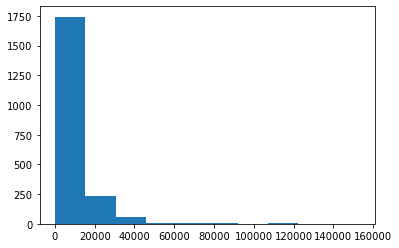

In [99]:
# Distribution of favorite_count
plt.hist(df.favorite_count)

The histogram above shows most dogs got a favorite_count less than 20000, but a few got very high favorite_count close to 160,000.  The printed table in [98] shows that for the 20 most popular dogs, there is only one floofer, while doggo, puppo, and pupper all get very high favorite_count.

#### Insight 3: what is the relationship between favorite count and the rating? Do dogs with a high rating also get a high favoite count?

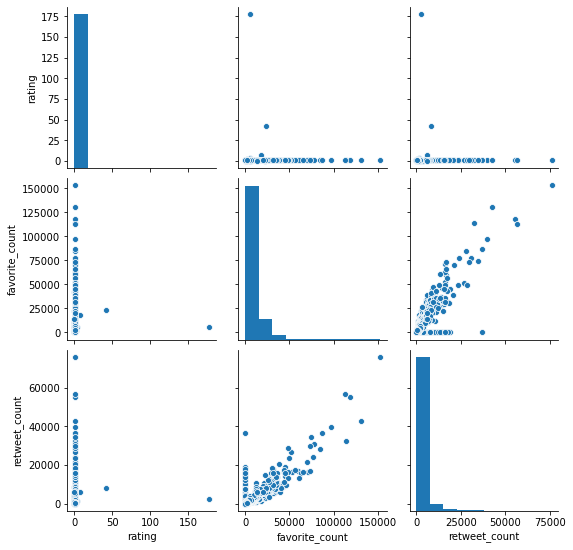

In [114]:
df['rating'] = df.rating_numerator/df.rating_denominator
df2 = df[['rating','favorite_count','retweet_count']]

g = sns.pairplot(df2)
plt.show()

The plot above shows the relationshop between retweet_count, favorite_count, and rating.  We can see that retweet_count and favorite_count have a strong positive correlation, but neither of favorite_count and retweet_count has an effect on the rating.  This is a surprise, because dogs with higher retweet_count should get higher rating.  The way these dogs got ratings is probably different than expected.